In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [11]:
# Velocities

v1 = 0.30689 
v2 = 0.12551

# From paper

m1 = 1
m2 = 1 
m3 = 1
x1_0 = -1
y1_0 = 0
x2_0 = 1
y2_0 = 0
x3_0 = 0
y3_0 = 0
vx1_0 =  v1
vy1_0 =  v2
vx2_0 = v1
vy2_0 = v2
vx3_0 = -2*v1/m3
vy3_0 = -2*v2/m3

In [3]:
def dSdt(t, S):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    return [vx1, vy1, vx2, vy2, vx3, vy3,
            m2/r12**3 * (x2-x1) + m3/r13**3 * (x3-x1),
            m2/r12**3 * (y2-y1) + m3/r13**3 * (y3-y1),
            m1/r12**3 * (x1-x2) + m3/r23**3 * (x3-x2),
            m1/r12**3 * (y1-y2) + m3/r23**3 * (y3-y2),
            m1/r13**3 * (x1-x3) + m2/r23**3 * (x2-x3),
            m1/r13**3 * (y1-y3) + m2/r23**3 * (y2-y3)]

In [12]:
t = np.linspace(0, 60, 20000)

In [13]:
sol = solve_ivp(dSdt, (0,60), y0=[x1_0, y1_0, x2_0, y2_0, x3_0, y3_0,
                       vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0],
                method = 'DOP853', t_eval=t, rtol=1e-10, atol=1e-13)

In [14]:
t = sol.t
x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

<IPython.core.display.Javascript object>


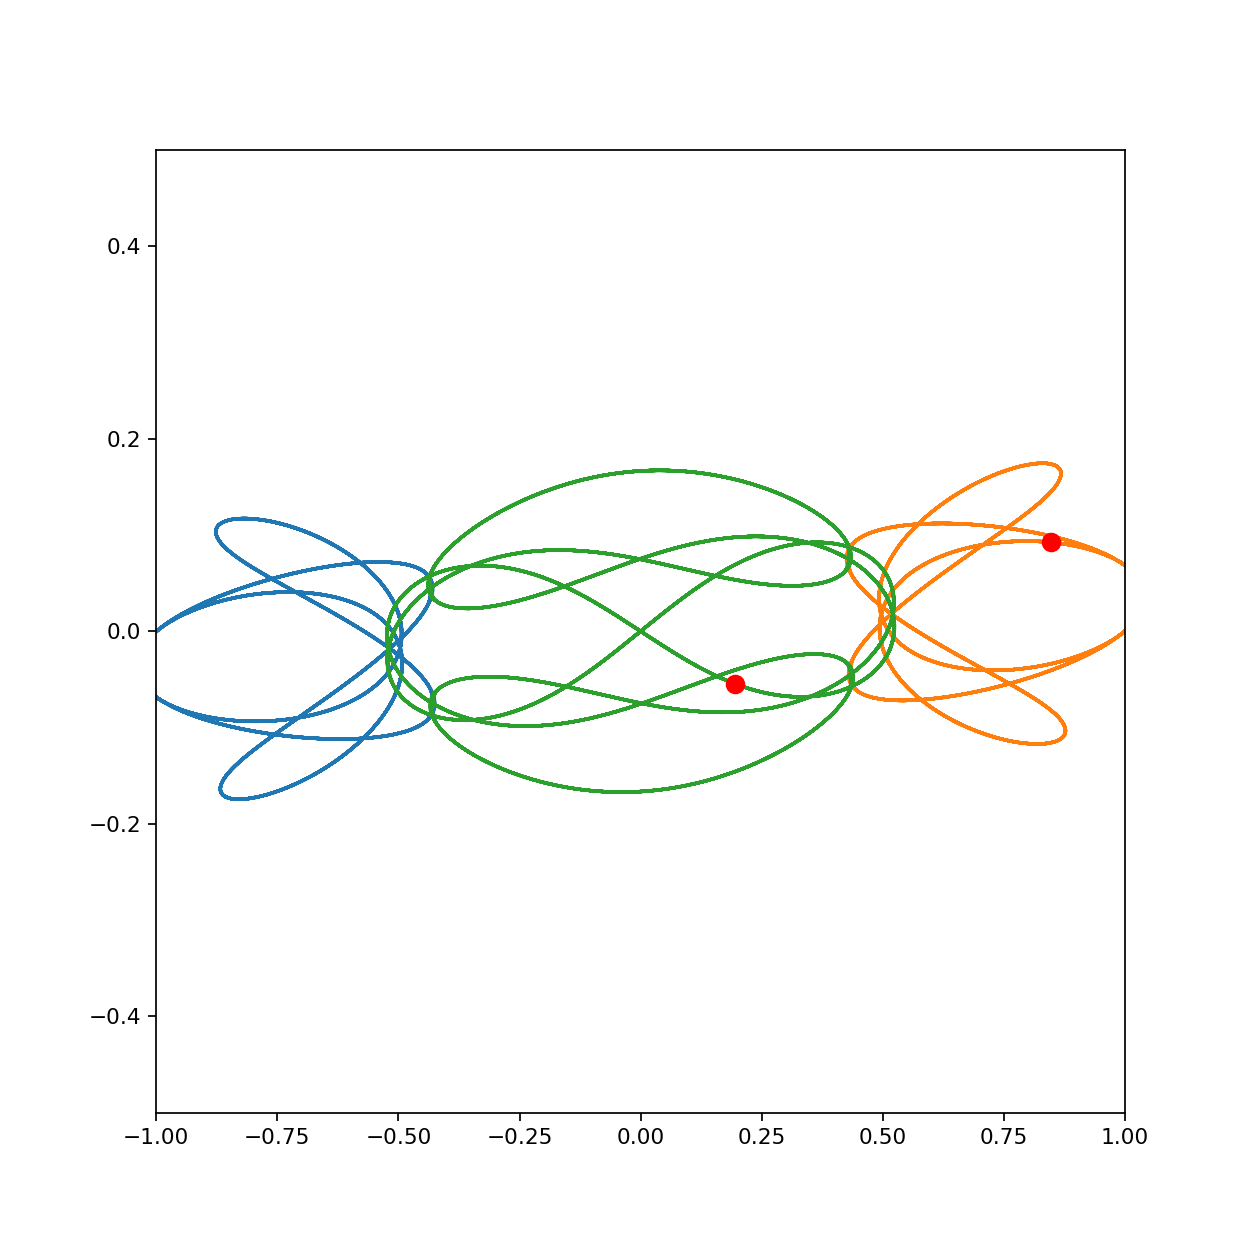

In [17]:
%matplotlib notebook
def animate(i):
    ln1.set_data([x1[i], x2[i], x3[i]], [y1[i], y2[i], y3[i]])
    #text.set_text('Time = {:.1f} Years'.format(i*tt))
fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.plot(x1,y1,x2,y2,x3,y3)
ln1, = plt.plot([], [],'ro', lw=3, markersize=8)
#text = plt.text(0, 1.75, '', fontsize=20, backgroundcolor='white', ha='center')
ax.set_ylim(-0.5,0.5)
ax.set_xlim(-1,1)
ax.grid(False)
#ax.set_xticks([])
#ax.set_yticks([])
ani = animation.FuncAnimation(fig, animate, frames=5000, interval=1)
#writer = animation.FFMpegWriter(fps=60, metadata=dict(artist='Saptarshi Sarkar'), bitrate=1800)
#ani.save('II.C.2a yin-yang I.mp4',writer=writer)